# Multivariate Regression Model

In [1]:
#importing main Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Load dataset
df = pd.read_csv(r"C:\Users\preet\Desktop\Top 10 ML Model Coding\model\USA_Housing.csv")
df.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_N_Rooms,Avg_Area_N_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


## Manipulation of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg_Area_Income        5000 non-null float64
Avg_Area_House_Age     5000 non-null float64
Avg_Area_N_Rooms       5000 non-null float64
Avg_Area_N_Bedrooms    5000 non-null float64
Area_Population        5000 non-null float64
Price                  5000 non-null float64
Address                5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.shape

(5000, 7)

In [5]:
df.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_N_Rooms,Avg_Area_N_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [6]:
df.isna().sum()

Avg_Area_Income        0
Avg_Area_House_Age     0
Avg_Area_N_Rooms       0
Avg_Area_N_Bedrooms    0
Area_Population        0
Price                  0
Address                0
dtype: int64

In [7]:
df.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_N_Rooms',
       'Avg_Area_N_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

## Data Visualization

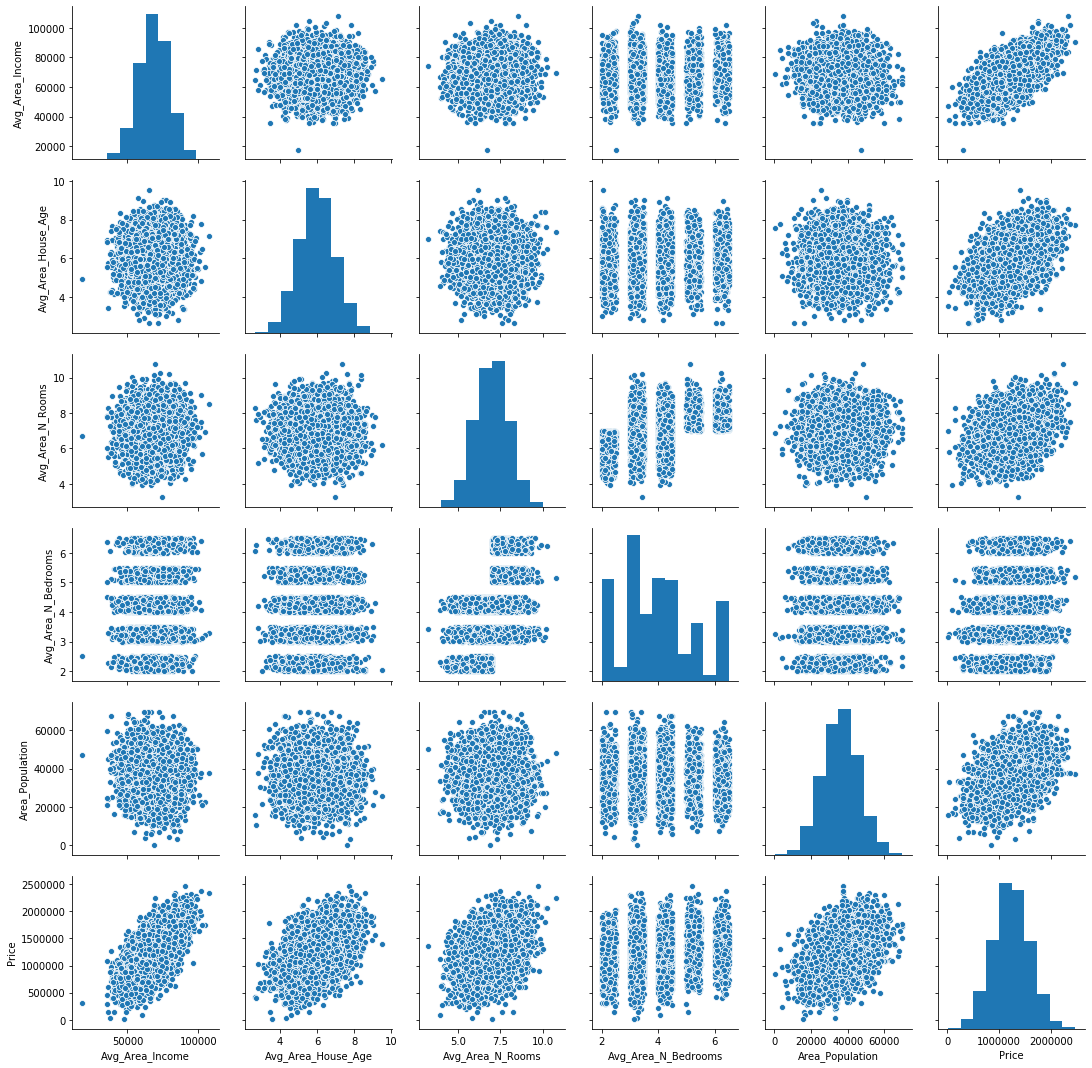

In [8]:
sns.pairplot(df)
plt.show()

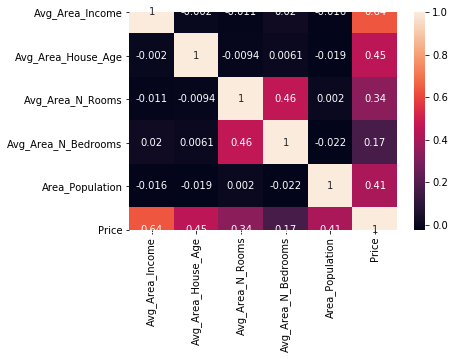

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

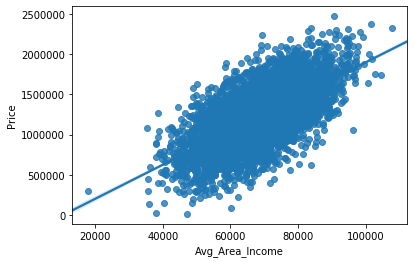

In [10]:
sns.regplot(x='Avg_Area_Income', y='Price', data=df)
plt.show()

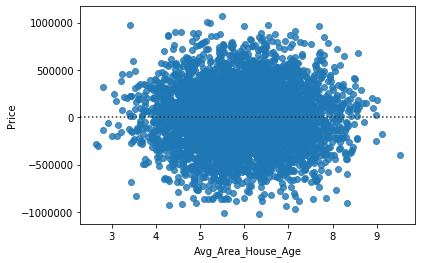

In [11]:
sns.residplot(df['Avg_Area_House_Age'], df['Price'])
plt.show()

In [13]:
X = df[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_N_Rooms',
       'Avg_Area_N_Bedrooms', 'Area_Population']]
Y = df[['Price']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=15)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lm.coef_

array([[2.16371666e+01, 1.65699819e+05, 1.21640093e+05, 8.15954157e+02,
        1.50819894e+01]])

In [18]:
lm.intercept_

array([-2639438.36081113])

In [19]:
prediction = lm.predict(X_test)

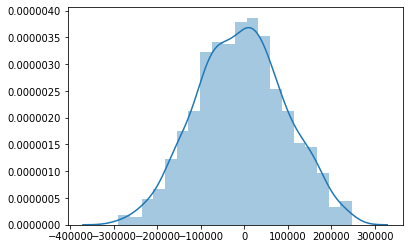

In [21]:
sns.distplot(y_test - prediction)
plt.show()

In [31]:
#Accuracy of the testing data
print("Accuracy: ", lm.score(X_test, y_test))

Accuracy:  0.911115297407481


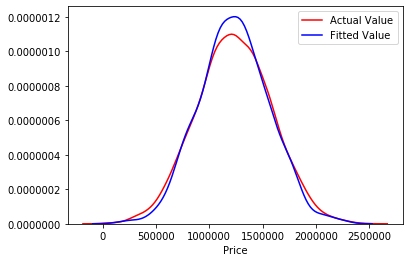

In [24]:
ax1 = sns.distplot(df['Price'], hist=False, color='Red', label='Actual Value')
sns.distplot(prediction, hist=False, color='blue', label='Fitted Value', ax=ax1)